In [ ]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# check the path
!pwd

/content


In [ ]:
# change folder
%cd '/content/drive/My Drive/Class-20210420-01/data_file'

/content/drive/.shortcut-targets-by-id/1Atr52kQtpKI__DG99japz14wr8jXJe6S/Class-20210420-01/data_file


In [ ]:
# check file in folder
!ls

'Assignment Day 20.ipynb'   melb_data.csv	 student_grade_prediction.xlsx
 data_student.pkl	   'property data.csv'	 USA_Housing.csv
 earthquake_data.csv	    quiz_data.json


In [ ]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns

# import sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


# import graph library
import matplotlib.pyplot as plt


In [ ]:
# read the data
df = pd.read_excel('student_grade_prediction.xlsx')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,4,19,19,20
1,GP,M,15,U,GT3,T,4,4,services,teacher,course,father,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5,2,19,18,18
2,MS,F,18,R,LE3,T,4,4,other,other,reputation,mother,2,3,0,no,no,no,no,yes,yes,yes,no,5,4,4,1,1,1,0,19,18,19
3,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,18,18,18
4,GP,M,15,U,LE3,T,4,2,teacher,other,course,mother,1,1,0,no,no,no,no,yes,yes,yes,no,3,5,2,1,1,3,10,18,19,19


In [ ]:
# simple data checking - get row and column of dataframe
print(df.shape)

(395, 33)


In [ ]:
# simple data checking - get columns name
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# check standard missing value - multiple column
df[df.isnull().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [ ]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())

school
GP    349
MS     46
Name: school, dtype: int64
sex
F    208
M    187
Name: sex, dtype: int64
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
address
U    307
R     88
Name: address, dtype: int64
famsize
GT3    281
LE3    114
Name: famsize, dtype: int64
Pstatus
T    354
A     41
Name: Pstatus, dtype: int64
Medu
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
Fedu
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
reason
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
guardian
mother    273
father     90
other      32
Name: guardian, dtype: int64
traveltime
1    257
2    107
3     23
4      8
Name: traveltime, dtype

In [ ]:
df['G_avg']= round((df['G1']+df['G2']+df['G3'])/3, 2)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg
0,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,4,19,19,20,19.33
1,GP,M,15,U,GT3,T,4,4,services,teacher,course,father,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5,2,19,18,18,18.33
2,MS,F,18,R,LE3,T,4,4,other,other,reputation,mother,2,3,0,no,no,no,no,yes,yes,yes,no,5,4,4,1,1,1,0,19,18,19,18.67
3,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,18,18,18,18.00
4,GP,M,15,U,LE3,T,4,2,teacher,other,course,mother,1,1,0,no,no,no,no,yes,yes,yes,no,3,5,2,1,1,3,10,18,19,19,18.67


In [ ]:
# create a new column named with an entry consisting of good student and bad student
df['Status']= np.where(df['G_avg'] > 15, 1, 0)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg,Status
0,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,4,19,19,20,19.33,1
1,GP,M,15,U,GT3,T,4,4,services,teacher,course,father,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5,2,19,18,18,18.33,1
2,MS,F,18,R,LE3,T,4,4,other,other,reputation,mother,2,3,0,no,no,no,no,yes,yes,yes,no,5,4,4,1,1,1,0,19,18,19,18.67,1
3,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,18,18,18,18.00,1
4,GP,M,15,U,LE3,T,4,2,teacher,other,course,mother,1,1,0,no,no,no,no,yes,yes,yes,no,3,5,2,1,1,3,10,18,19,19,18.67,1


In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg,Status,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,16,4,3,1,4,0,4,2,2,1,1,2,4,19,19,20,19.33,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0
1,15,4,4,1,2,0,4,3,3,1,1,5,2,19,18,18,18.33,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0
2,18,4,4,2,3,0,5,4,4,1,1,1,0,19,18,19,18.67,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0
3,17,4,4,2,1,1,4,2,4,2,3,2,24,18,18,18,18.00,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,0
4,15,4,2,1,1,0,3,5,2,1,1,3,10,18,19,19,18.67,1,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0


0    348
1     47
Name: Status, dtype: int64


Text(0, 0.5, 'Frequency')

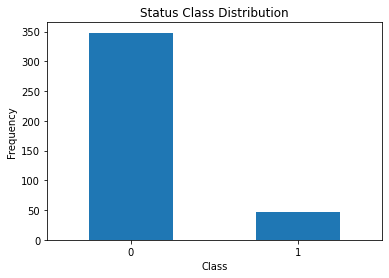

In [ ]:
print(df['Status'].value_counts())

count_classes = pd.value_counts(df['Status'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Status Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

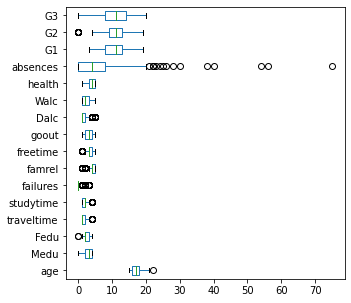

In [ ]:
# assign variable for column in numeric type
numeric_column = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                  'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# check outlier using boxplot
df.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

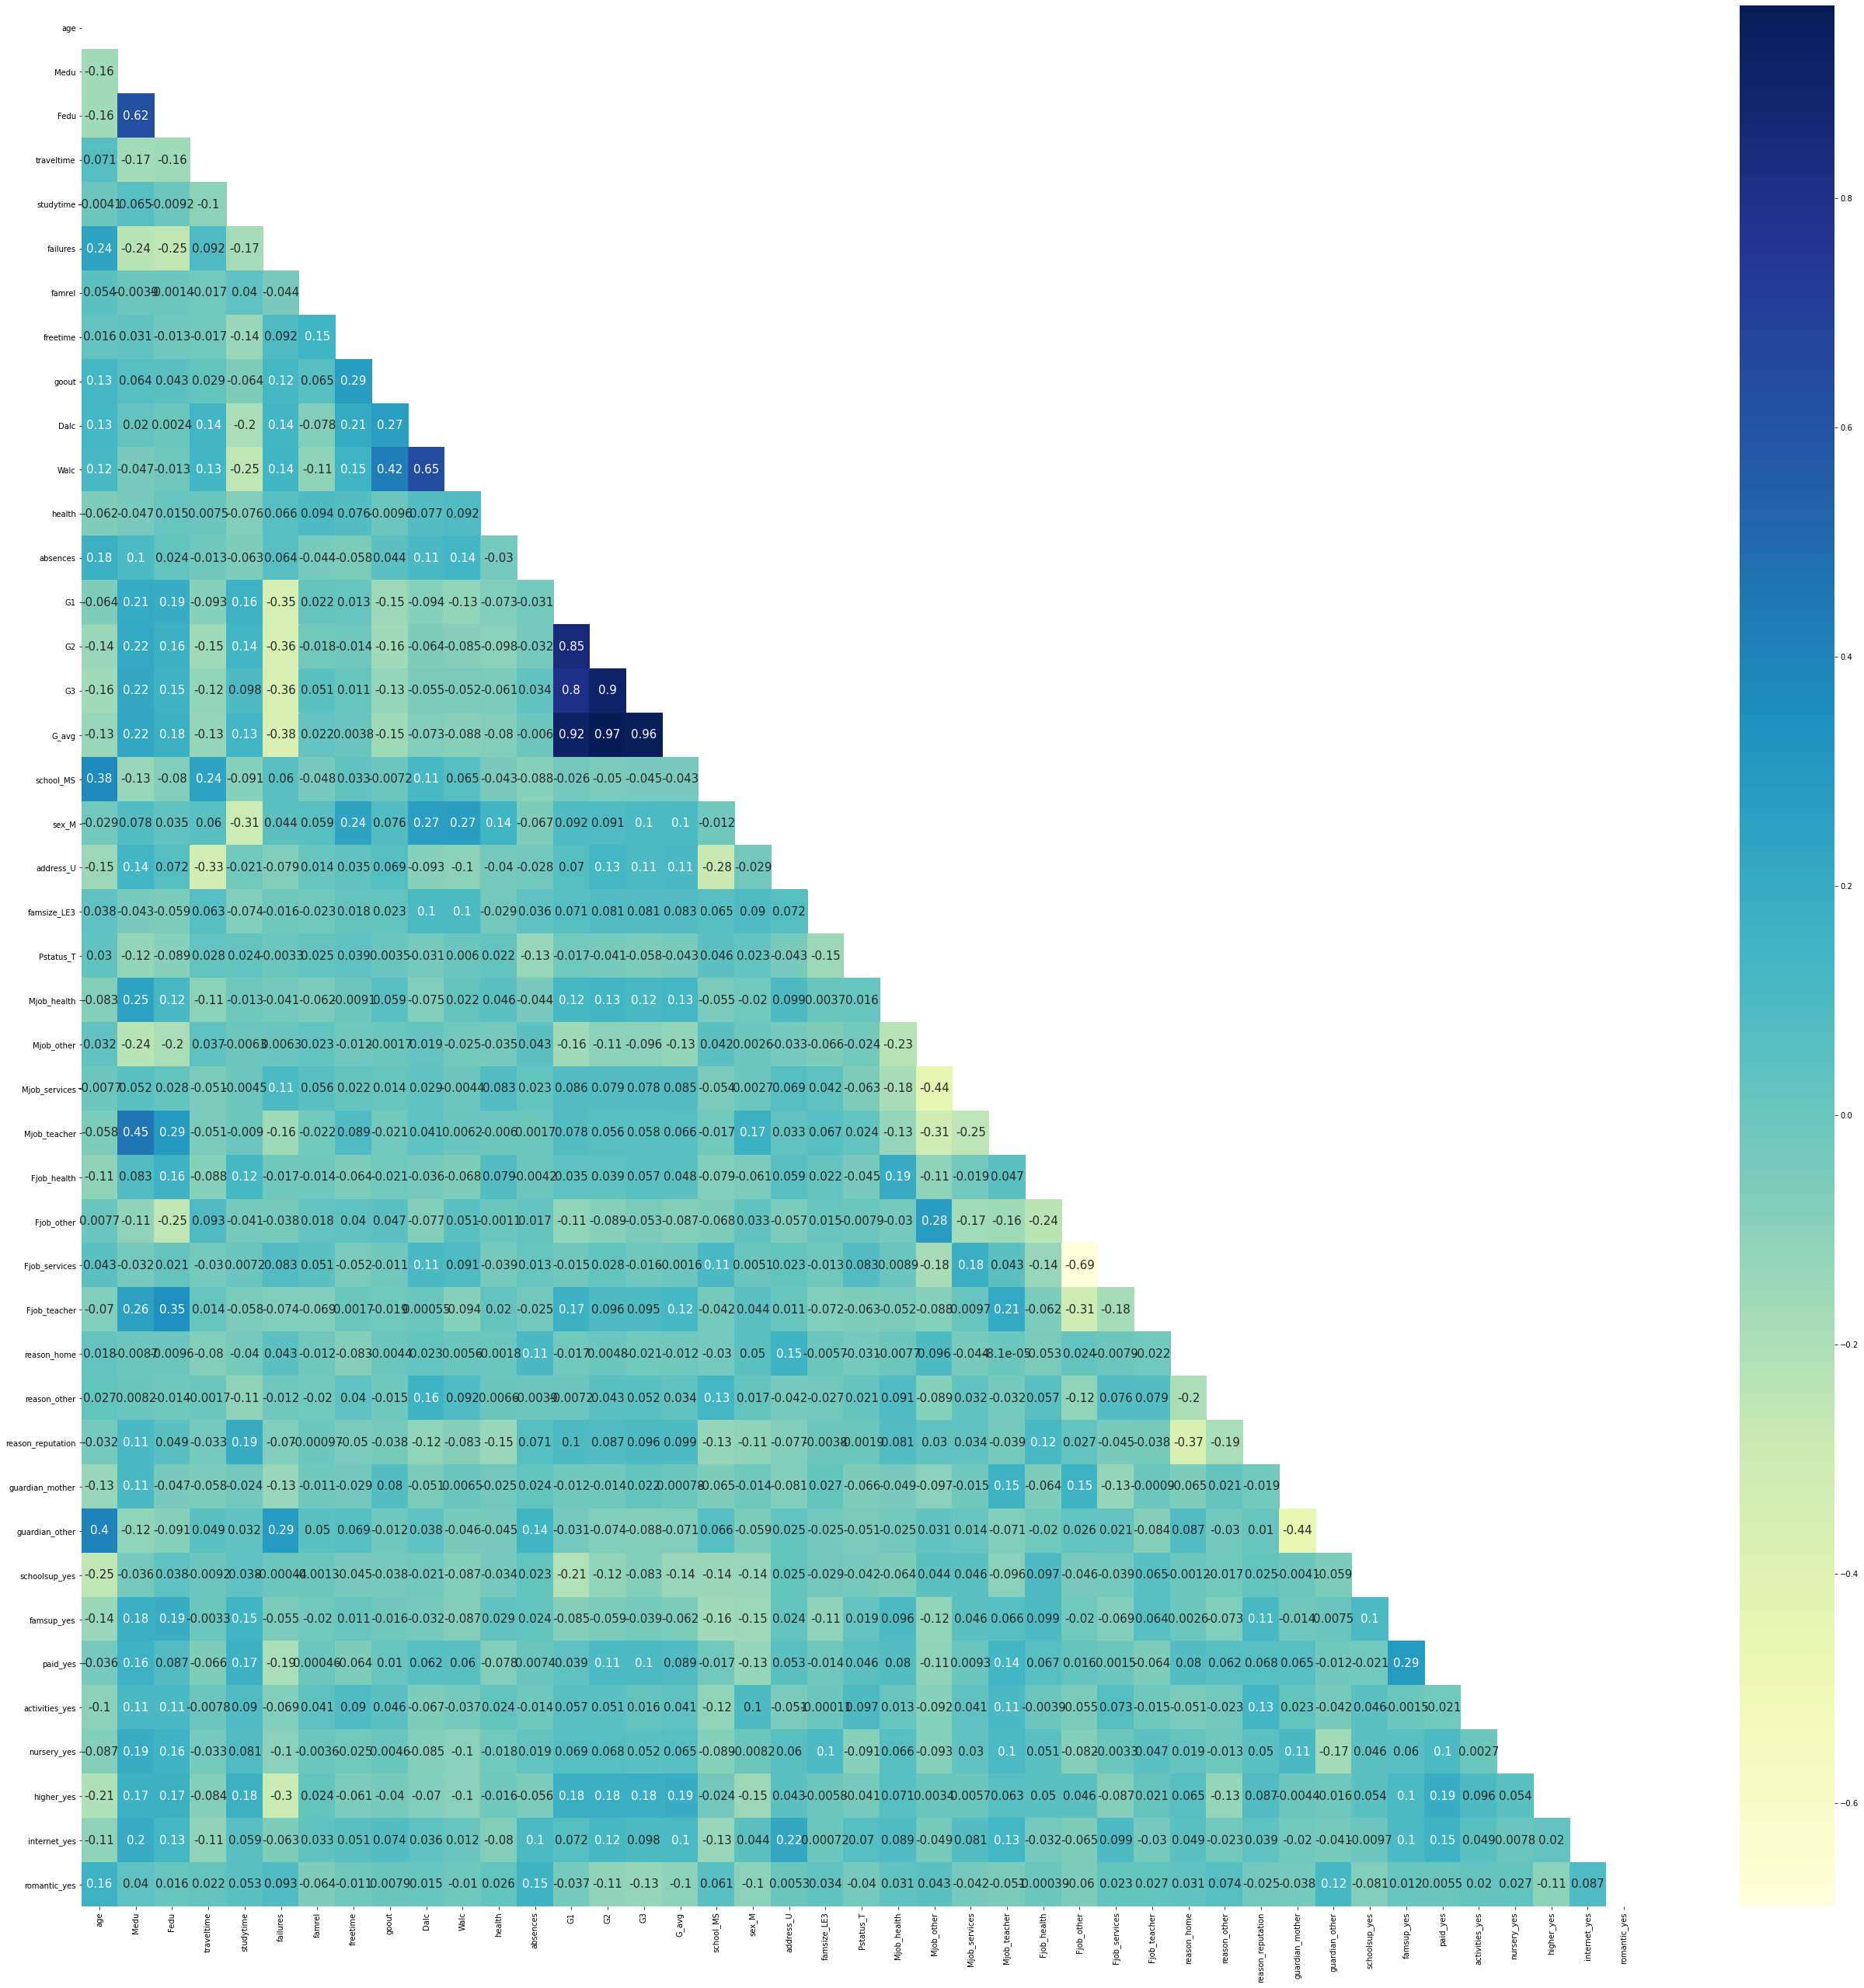

In [ ]:
# check correlation between feature column

correlation_between_column = df.drop(['Status'], axis=1).corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(45,45))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

# EXPERIMENT 1

In experiment 1, I did not treat the data

In [ ]:
# determine training data and test data
X = df.drop(['Status'], axis=1)
y = df['Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 42)

# standarization
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )



In [ ]:
# solution for unbalanced Status column
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 285, 1: 31})
After SMOTE : Counter({0: 285, 1: 285})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Support Vector Machine (SVM)

In [ ]:
# Determine the best parameters for SVM models

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

svc = SVC()
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# best parameter
grid_svc.best_params_

{'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
# make model with the best parameter
model_svc = SVC(C = 0.8, gamma =  0.1, kernel= 'rbf')
model_svc.fit(X_train_smote, y_train_smote)
pred_model_svc = model_svc.predict(X_test)
y_train_pred = model_svc.predict(X_train_smote)
# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_model_svc))

# confusing matrix
pd.crosstab(y_test,pred_model_svc)

Accuracy Train Data: 1.0
Accuracy Test Data: 0.7974683544303798


col_0,0
Status,
0,63
1,16


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_model_svc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        63
           1       0.00      0.00      0.00        16

    accuracy                           0.80        79
   macro avg       0.40      0.50      0.44        79
weighted avg       0.64      0.80      0.71        79



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Neighbours

In [ ]:
# menentukan parameter terbaik untuk model KNN
model = KNeighborsClassifier()
param_grid ={'n_neighbors':np.arange(1,100), 'weights':['uniform','distance']}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jo

In [ ]:
gscv.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2, weights= 'uniform')
knn.fit( X_train_smote, y_train_smote )
pred_knn = knn.predict( X_test )

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_knn))

# confusing matrix
pd.crosstab(y_test,pred_knn)

Accuracy Train Data: 1.0
Accuracy Test Data: 0.8481012658227848


col_0,0,1
Status,,
0,59,4
1,8,8


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        63
           1       0.67      0.50      0.57        16

    accuracy                           0.85        79
   macro avg       0.77      0.72      0.74        79
weighted avg       0.84      0.85      0.84        79



#### Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit( X_train_smote, y_train_smote )
pred_logreg = logreg.predict( X_test )
y_train_pred = logreg.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_logreg))

# confusion matrix
pd.crosstab(y_test,pred_logreg)

Accuracy Train Data: 1.0
Accuracy Test Data: 0.9493670886075949


col_0,0,1
Status,,
0,59,4
1,0,16


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        63
           1       0.80      1.00      0.89        16

    accuracy                           0.95        79
   macro avg       0.90      0.97      0.93        79
weighted avg       0.96      0.95      0.95        79



# EXPERIMENT 2

In experiment 2, I will remove the features that have high correlation (G1, G2, and G3)

In [ ]:
# determine training data and test data
X2 = df.drop(['Status','G1','G2','G3'], axis=1)
y2 = df['Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X2, y2, test_size=0.2, random_state = 42)

# standarization
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )



In [ ]:
# solution for unbalanced Status column
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 285, 1: 31})
After SMOTE : Counter({0: 285, 1: 285})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Support Vector Machine (SVM)

In [ ]:
# Determine the best parameters for SVM models

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

svc = SVC()
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# best parameter
grid_svc.best_params_

{'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
# make model with the best parameter
model_svc = SVC(C = 0.8, gamma =  0.1, kernel= 'rbf')
model_svc.fit(X_train_smote, y_train_smote)
pred_model_svc = model_svc.predict(X_test)
y_train_pred = model_svc.predict(X_train_smote)
# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_model_svc))

# confusing matrix
pd.crosstab(y_test,pred_model_svc)

Accuracy Train Data: 1.0
Accuracy Test Data: 0.7974683544303798


col_0,0
Status,
0,63
1,16


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_model_svc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        63
           1       0.00      0.00      0.00        16

    accuracy                           0.80        79
   macro avg       0.40      0.50      0.44        79
weighted avg       0.64      0.80      0.71        79



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Neighbours

In [ ]:
# menentukan parameter terbaik untuk model KNN
model = KNeighborsClassifier()
param_grid ={'n_neighbors':np.arange(1,100), 'weights':['uniform','distance']}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jo

In [ ]:
gscv.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2, weights= 'uniform')
knn.fit( X_train_smote, y_train_smote )
pred_knn = knn.predict( X_test )

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_knn))

# confusing matrix
pd.crosstab(y_test,pred_knn)

Accuracy Train Data: 1.0
Accuracy Test Data: 0.8227848101265823


col_0,0,1
Status,,
0,58,5
1,9,7


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        63
           1       0.58      0.44      0.50        16

    accuracy                           0.82        79
   macro avg       0.72      0.68      0.70        79
weighted avg       0.81      0.82      0.81        79



#### Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit( X_train_smote, y_train_smote )
pred_logreg = logreg.predict( X_test )
y_train_pred = logreg.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_logreg))

# confusion matrix
pd.crosstab(y_test,pred_logreg)

Accuracy Train Data: 1.0
Accuracy Test Data: 0.9240506329113924


col_0,0,1
Status,,
0,57,6
1,0,16


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        63
           1       0.73      1.00      0.84        16

    accuracy                           0.92        79
   macro avg       0.86      0.95      0.90        79
weighted avg       0.94      0.92      0.93        79



# EXPERIMENT 3

In experiment 3, I will implement PCI to reduce features (I want the variant described that is 95%)

In [ ]:
df_1 = df.drop(['Status'], axis=1)
scaler = StandardScaler()
scaler.fit(df_1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data = scaler.transform(df_1)
scaled_data

array([[-0.54628694,  1.14385567,  0.44025694, ...,  0.23094011,
         0.44789274, -0.70844982],
       [-1.33095364,  1.14385567,  1.36037064, ...,  0.23094011,
         0.44789274, -0.70844982],
       [ 1.02304645,  1.14385567,  1.36037064, ...,  0.23094011,
         0.44789274, -0.70844982],
       ...,
       [ 0.23837976, -1.60000865, -1.39997047, ..., -4.33012702,
        -2.23267743,  1.41153259],
       [-0.54628694,  0.22923423,  0.44025694, ...,  0.23094011,
         0.44789274,  1.41153259],
       [ 1.02304645,  0.22923423,  0.44025694, ...,  0.23094011,
         0.44789274,  1.41153259]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(scaled_data)
reduced = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(395, 43)

In [ ]:
reduced.shape

(395, 33)

In [ ]:
# determine training data and test data
y3 = df['Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( reduced, y3, test_size=0.2, random_state = 42)

# standarization
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )



In [ ]:
# solution for unbalanced Status column
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 285, 1: 31})
After SMOTE : Counter({0: 285, 1: 285})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Support Vector Machine (SVM)

In [ ]:
# Determine the best parameters for SVM models

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

svc = SVC()
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# best parameter
grid_svc.best_params_

{'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
# make model with the best parameter
model_svc = SVC(C = 0.8, gamma =  0.1, kernel= 'rbf')
model_svc.fit(X_train_smote, y_train_smote)
pred_model_svc = model_svc.predict(X_test)
y_train_pred = model_svc.predict(X_train_smote)
# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_model_svc))

# confusing matrix
pd.crosstab(y_test,pred_model_svc)

Accuracy Train Data: 1.0
Accuracy Test Data: 0.7974683544303798


col_0,0
Status,
0,63
1,16


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_model_svc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        63
           1       0.00      0.00      0.00        16

    accuracy                           0.80        79
   macro avg       0.40      0.50      0.44        79
weighted avg       0.64      0.80      0.71        79



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Neighbours

In [ ]:
# menentukan parameter terbaik untuk model KNN
model = KNeighborsClassifier()
param_grid ={'n_neighbors':np.arange(1,100), 'weights':['uniform','distance']}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jo

In [ ]:
gscv.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2, weights= 'uniform')
knn.fit( X_train_smote, y_train_smote )
pred_knn = knn.predict( X_test )

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_knn))

# confusing matrix
pd.crosstab(y_test,pred_knn)

Accuracy Train Data: 1.0
Accuracy Test Data: 0.810126582278481


col_0,0,1
Status,,
0,57,6
1,9,7


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.54      0.44      0.48        16

    accuracy                           0.81        79
   macro avg       0.70      0.67      0.68        79
weighted avg       0.80      0.81      0.80        79



#### Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit( X_train_smote, y_train_smote )
pred_logreg = logreg.predict( X_test )
y_train_pred = logreg.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_logreg))

# confusion matrix
pd.crosstab(y_test,pred_logreg)

Accuracy Train Data: 0.9982456140350877
Accuracy Test Data: 0.9240506329113924


col_0,0,1
Status,,
0,57,6
1,0,16


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        63
           1       0.73      1.00      0.84        16

    accuracy                           0.92        79
   macro avg       0.86      0.95      0.90        79
weighted avg       0.94      0.92      0.93        79



# EXPERIMENT 4

In experiment 4, I will implement PCI to reduce features (I want to use 5 features)

In [ ]:
df_1 = df.drop(['Status'], axis=1)
scaler = StandardScaler()
scaler.fit(df_1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data = scaler.transform(df_1)
scaled_data

array([[-0.54628694,  1.14385567,  0.44025694, ...,  0.23094011,
         0.44789274, -0.70844982],
       [-1.33095364,  1.14385567,  1.36037064, ...,  0.23094011,
         0.44789274, -0.70844982],
       [ 1.02304645,  1.14385567,  1.36037064, ...,  0.23094011,
         0.44789274, -0.70844982],
       ...,
       [ 0.23837976, -1.60000865, -1.39997047, ..., -4.33012702,
        -2.23267743,  1.41153259],
       [-0.54628694,  0.22923423,  0.44025694, ...,  0.23094011,
         0.44789274,  1.41153259],
       [ 1.02304645,  0.22923423,  0.44025694, ...,  0.23094011,
         0.44789274,  1.41153259]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca.fit(scaled_data)
reduced = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(395, 43)

In [ ]:
reduced.shape

(395, 5)

In [ ]:
# determine training data and test data
y3 = df['Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( reduced, y3, test_size=0.2, random_state = 42)

# standarization
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )



In [ ]:
# solution for unbalanced Status column
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 285, 1: 31})
After SMOTE : Counter({0: 285, 1: 285})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Support Vector Machine (SVM)

In [ ]:
# Determine the best parameters for SVM models

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

svc = SVC()
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# best parameter
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.4, 'kernel': 'rbf'}

In [ ]:
# make model with the best parameter
model_svc = SVC(C = 1.4, gamma =  1.4, kernel= 'rbf')
model_svc.fit(X_train_smote, y_train_smote)
pred_model_svc = model_svc.predict(X_test)
y_train_pred = model_svc.predict(X_train_smote)
# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_model_svc))

# confusing matrix
pd.crosstab(y_test,pred_model_svc)

Accuracy Train Data: 0.9982456140350877
Accuracy Test Data: 0.8354430379746836


col_0,0,1
Status,,
0,62,1
1,12,4


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_model_svc))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91        63
           1       0.80      0.25      0.38        16

    accuracy                           0.84        79
   macro avg       0.82      0.62      0.64        79
weighted avg       0.83      0.84      0.80        79



#### K-Neighbours

In [ ]:
# menentukan parameter terbaik untuk model KNN
model = KNeighborsClassifier()
param_grid ={'n_neighbors':np.arange(1,100), 'weights':['uniform','distance']}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jo

In [ ]:
gscv.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2, weights= 'uniform')
knn.fit( X_train_smote, y_train_smote )
pred_knn = knn.predict( X_test )

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_knn))

# confusing matrix
pd.crosstab(y_test,pred_knn)

Accuracy Train Data: 0.9736842105263158
Accuracy Test Data: 0.8607594936708861


col_0,0,1
Status,,
0,61,2
1,9,7


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        63
           1       0.78      0.44      0.56        16

    accuracy                           0.86        79
   macro avg       0.82      0.70      0.74        79
weighted avg       0.85      0.86      0.84        79



#### Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit( X_train_smote, y_train_smote )
pred_logreg = logreg.predict( X_test )
y_train_pred = logreg.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred))
print('Accuracy Test Data:',accuracy_score(y_test,pred_logreg))

# confusion matrix
pd.crosstab(y_test,pred_logreg)

Accuracy Train Data: 0.9736842105263158
Accuracy Test Data: 0.9493670886075949


col_0,0,1
Status,,
0,59,4
1,0,16


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        63
           1       0.80      1.00      0.89        16

    accuracy                           0.95        79
   macro avg       0.90      0.97      0.93        79
weighted avg       0.96      0.95      0.95        79



Based on the experiments that have been carried out, the logistic regression model in experiment 4 is the best model of the other models. This is because of the high accuracy value and the small difference between the accuracy value of the training data and the test data

This model is not the best model of all models, but only the best model from the experiments that have been carried out. Additional experiments may include adding other algorithms (such as random forest), eliminating the data outliers, and more.